In [1]:
pip install biopython

  Using cached biopython-1.84-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib.collections import PathCollection
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.stats import linregress

plt.show()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

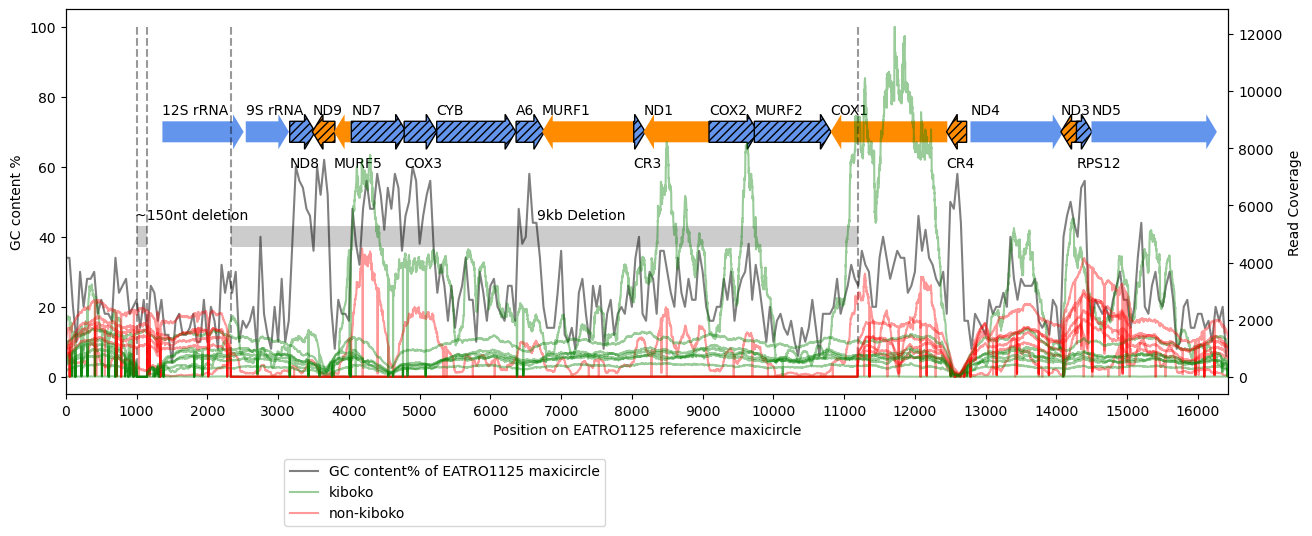

In [3]:
#maxicircle summary
def drawarrow(xstart,xend,name,txty=70,edited=True,txtcolor='k',hw=10,upper=True):
    if (xend-xstart)<150 and (xend-xstart)>-150:
        hl=xend-xstart-1
    else:
        hl=150
    if xstart<xend:
        if edited==False:
            plt.arrow(xstart,txty,(xend-xstart-hl),0,head_width=hw, head_length=hl, width=hw*0.6,fc='cornflowerblue', 
                      ec='None')
        else:
            plt.arrow(xstart,txty,(xend-xstart-hl),0,head_width=hw, head_length=hl, width=hw*0.6,fc='cornflowerblue', 
                      ec='black',hatch='////')
    else:
        if edited==False:
            plt.arrow(xstart,txty,(xend-xstart+hl),0,head_width=hw, head_length=hl, width=hw*0.6,fc='darkorange', 
                      ec='None')
        else:
            plt.arrow(xstart,txty,(xend-xstart+hl),0,head_width=hw, head_length=hl, width=hw*0.6,fc='darkorange', 
                          ec='black',hatch='////')
    if upper==True:
        plt.text(min(xstart,xend),txty+hw/2,name,color=txtcolor)
    else:
        plt.text(min(xstart,xend),txty-hw,name,color=txtcolor)

#plt.plot([1,16431],[1,1],color='k')
def plot_maxicircle_genes():
    drawarrow(1364,2512,'12S rRNA',edited=False)
    drawarrow(2542,3153,'9S rRNA',edited=False)
    drawarrow(3163,3523,'ND8',upper=False)
    drawarrow(3802,3483,'ND9')
    drawarrow(4021,3789,'MURF5',edited=False,upper=False)
    drawarrow(4033,4811,'ND7')
    drawarrow(4781,5243,'COX3',upper=False)
    #drawarrow(4924,4877,'gRNA_MURF2',2,edited=False,txtcolor='red')
    drawarrow(5241,6358,'CYB')
    drawarrow(6363,6765,'A6')
    drawarrow(8075,6731,'MURF1',edited=False)
    drawarrow(8026,8189,'CR3',upper=False)
    drawarrow(9122,8163,'ND1',edited=False)
    drawarrow(9090,9780,'COX2')
    drawarrow(9730,10815,'MURF2')
    drawarrow(12458,10809,'COX1',edited=False)
    drawarrow(12731,12448,'CR4',upper=False)
    #drawarrow(12750,12797,'gRNA_MURF2',2,edited=False,txtcolor='red')#on sense strand
    drawarrow(12785,14098,'ND4',edited=False)
    drawarrow(14332,14064,'ND3')
    drawarrow(14283,14503,'RPS12',upper=False)
    drawarrow(14496,16268,'ND5',edited=False)
def get_coverage(file):
    f=open(file)
    cons=next(f).strip('\n').split('\t')[1]
    bases=next(f).strip('\n').split('\t')
    coverage=[sum([int(count) for count in l.strip('\n').split('\t')]) for l in f]
    m=max(coverage)
    rel=[i/m*100 for i in coverage] #may want to use this somehow
    return(coverage)

def plot_deletion(start,end,txt,hl=200):
    middle=(start+end)/2
    plt.arrow(middle, 40, end-middle-hl, 0,head_width=10, head_length=hl, 
              width=6, fc='k',ec='None',alpha=0.2)
    plt.arrow(middle, 40, start-middle+hl, 0,head_width=10, head_length=hl, 
              width=6, fc='k',ec='None',alpha=0.2)
    plt.vlines(start,0,100,colors='k',linestyles='dashed',alpha=0.4)
    plt.vlines(end,0,100,colors='k',linestyles='dashed',alpha=0.4)
    plt.text((start+end)/2-100,45,txt,color='k')
    
def GC_content(seq,wz):
    fig, ax1 = plt.subplots(figsize=(15,5)) 
    GC=[(seq[i:i+wz].count('G')+seq[i:i+wz].count('C'))/wz*100 for i in range(0,len(seq),wz)]
    plot1=ax1.plot(list(range(0,len(seq),wz)),GC,color='k',label='GC content% of EATRO1125 maxicircle',alpha=0.5)
    ax1.set_ylabel('GC content %') 
    #plot 9kb deletion
    plot_deletion(2331,11189,'9kb Deletion',hl=0)
    #plot small deleton
    plot_deletion(1000,1147,'~150nt deletion',hl=0)
    #plot maxicircle
    plot_maxicircle_genes()
    #plot coverage
    coverage1=get_coverage('/home/jovyan/SNPs_calling/TeqTev_maxicircle/Te-Ap-ND1_kDNA.txt')
    ax2 = ax1.twinx() #add twin axis
    ax2.set_ylabel('Read Coverage') 
    plot2=ax2.plot(list(range(0,len(seq),1)),coverage1,color='g',label='kiboko',alpha=0.4)
    coverage2=get_coverage('/home/jovyan/SNPs_calling/TeqTev_maxicircle/Vietnam_kDNA.txt')
    plot3=ax2.plot(list(range(0,len(seq),1)),coverage2,color='r',label='non-kiboko',alpha=0.4)
    #plot coverage of other strains
    files=!ls '/home/jovyan/SNPs_calling/TeqTev_maxicircle/'
    for f in files:
        strains=['American','ATCC','Phiilppines','STIB818','Vietnam'] #with type A minicircle
        if 'txt' in f and 'kDNA.txt' not in f and 'pub' not in f:
            coverage=get_coverage('/home/jovyan/SNPs_calling/TeqTev_maxicircle/'+f)
            if [ele for ele in strains if(ele in f)]:
                plot=ax2.plot(list(range(0,len(seq),1)),coverage,color='r',alpha=0.4)
            else:
                plot=ax2.plot(list(range(0,len(seq),1)),coverage,color='g',alpha=0.4)                 
    # Add legends
    lns = plot1 + plot2+plot3
    labels = [l.get_label() for l in lns]
    plt.legend(lns, labels, bbox_to_anchor=(0.47, -0.15)) #put the legend under the graph
    # setting up x axis
    plt.xlim(0,len(seq))
    plt.xticks(range(0,len(seq),1000))
    ax1.set_xlabel('Position on EATRO1125 reference maxicircle')
    plt.show()

#execution
seq=SeqIO.read('/home/jovyan/SNPs_calling/TeqTev_maxicircle/EATRO1125_partial.fasta','fasta').seq
GC_content(seq,50)

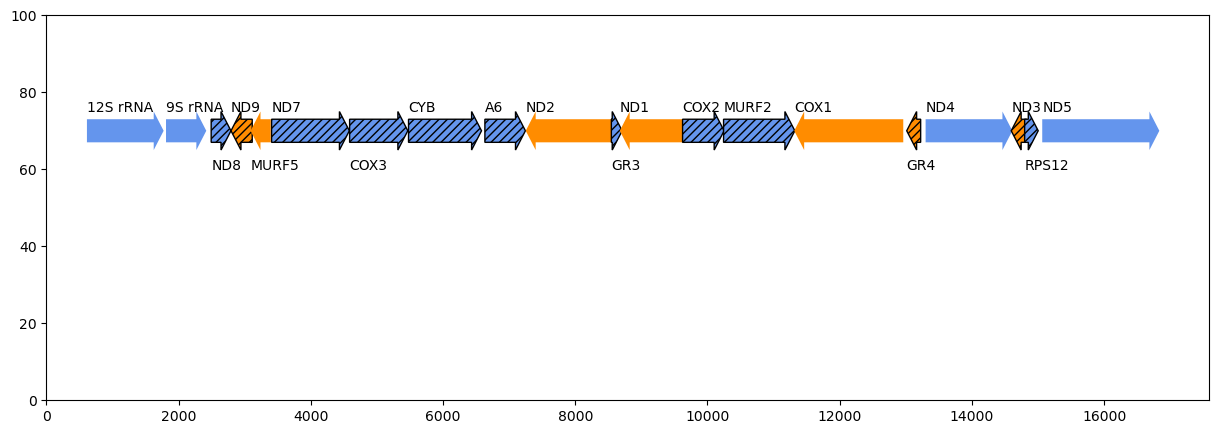

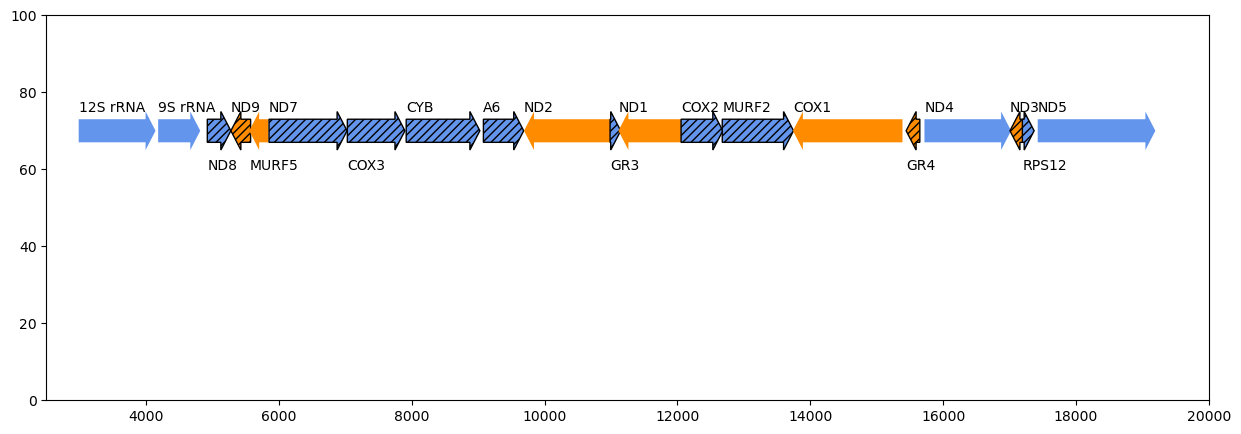

In [4]:
#plt.plot([1,16431],[1,1],color='k')
def maxicircle_annotation_Lmajor():
    fig, ax1 = plt.subplots(figsize=(15,5)) 
    drawarrow(614,1774,'12S rRNA',edited=False)
    drawarrow(1810,2419,'9S rRNA',edited=False)
    drawarrow(2493,2792,'ND8',upper=False)
    drawarrow(3114,2793,'ND9')
    drawarrow(3394,3089,'MURF5',edited=False,upper=False)
    drawarrow(3407,4583,'ND7')
    drawarrow(4587,5467,'COX3',upper=False)
    #drawarrow(4924,4877,'gRNA_MURF2',2,edited=False,txtcolor='red')
    drawarrow(5478,6582,'CYB')
    drawarrow(6633,7246,'A6')
    drawarrow(8584,7251,'ND2',edited=False)
    drawarrow(8546,8709,'GR3',upper=False)
    drawarrow(9614,8673,'ND1',edited=False)
    drawarrow(9623,10251,'COX2')
    drawarrow(10243,11321,'MURF2')
    drawarrow(12961,11312,'COX1',edited=False)
    drawarrow(13224,13013,'GR4',upper=False)
    #drawarrow(12750,12797,'gRNA_MURF2',2,edited=False,txtcolor='red')#on sense strand
    drawarrow(13299,14611,'ND4',edited=False)
    drawarrow(14825,14594,'ND3')
    drawarrow(14797,15002,'RPS12',upper=False)
    drawarrow(15063,16834,'ND5',edited=False)
    plt.xlim(0,17583)
    plt.ylim(0,100)
    plt.show()
def maxicircle_annotation_Cf():
    fig, ax1 = plt.subplots(figsize=(15,5)) 
    drawarrow(2987,4144,'12S rRNA',edited=False)
    drawarrow(4183,4817,'9S rRNA',edited=False)
    drawarrow(4923,5277,'ND8',upper=False)
    drawarrow(5575,5278,'ND9')
    drawarrow(5841,5554,'MURF5',edited=False,upper=False)
    drawarrow(5852,7027,'ND7')
    drawarrow(7031,7898,'COX3',upper=False)
    drawarrow(7917,9026,'CYB')
    drawarrow(9079,9686,'A6')
    drawarrow(11027,9691,'ND2',edited=False)
    drawarrow(10986,11146,'GR3',upper=False)
    drawarrow(12053,11112,'ND1',edited=False)
    drawarrow(12055,12683,'COX2')
    drawarrow(12675,13748,'MURF2')
    drawarrow(15388,13739,'COX1',edited=False)
    drawarrow(15649,15443,'GR4',upper=False)
    drawarrow(15719,17023,'ND4',edited=False)
    drawarrow(17218,17006,'ND3')
    drawarrow(17193,17370,'RPS12',upper=False)
    drawarrow(17424,19195,'ND5',edited=False)
    plt.xlim(2500,20000)
    plt.ylim(0,100)
    plt.show()
    plt.show()
maxicircle_annotation_Lmajor()
maxicircle_annotation_Cf()

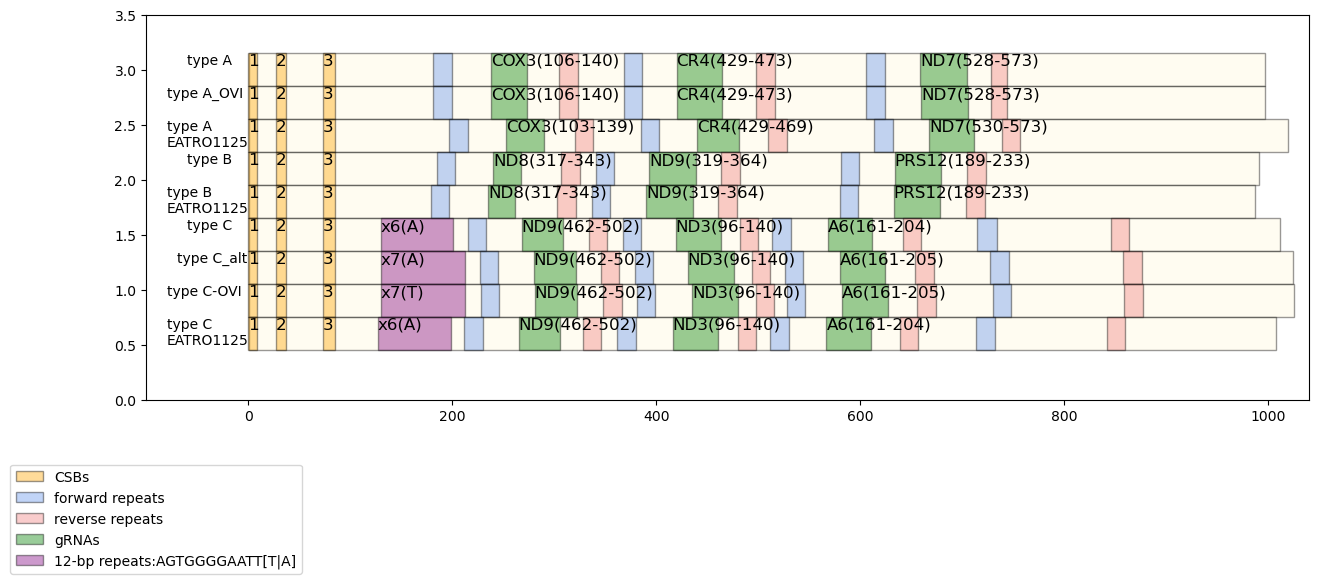

In [5]:
#draw annotated minicircles
def draw_one(xstart,xend,name,txty=1.5,txtcolor='k',fc='darkorange',upper=True):
    hl,labels=0,{'orange':'CSBs','cornflowerblue':'forward repeats','lightcoral':'reverse repeats',
                'yellow':'A tracts','g':'gRNAs','purple':'12-bp repeats:AGTGGGGAATT[T|A]'}
    if fc in labels.keys():
        plt.arrow(xstart,txty,(xend-xstart+hl),0,head_width=0.1, head_length=hl, width=0.3,fc=fc,alpha=0.4,label=labels[fc])
    else:
        plt.arrow(xstart,txty,(xend-xstart+hl),0,head_width=0.1, head_length=hl, width=0.3,fc=fc,alpha=0.4)
    if upper=='middle':
        plt.text(xstart,txty+0.15,name,color=txtcolor,fontsize='large',va='top')
def draw_all(pairs,y,mini='need minicircle name',position=-60):
    plt.text(position,y+0.15,mini,color='k',fontsize='medium',va='top')
    for pair in pairs: #pairs is a list of tuples, pair is a tuple
        if len(pair)==5:
            draw_one(pair[0],pair[1],pair[2],txty=y,txtcolor='k',fc=pair[3],upper=pair[4])
        else:
            draw_one(pair[0],pair[1],pair[2],txty=y,txtcolor='k',fc=pair[3])

#start plotting
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax.set_ylim(0,3.5)
ax.set_xlim(-100,1040)
#A tract parameters no longer in use:
(924, 997,'','yellow','middle')
(924, 997,'','yellow','middle')
(918, 991,'','yellow','middle')
(927, 1012,'','yellow','middle')
(941, 1025,'','yellow','middle')
#type A
draw_all([(1,997,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (181,200,'','cornflowerblue'),(305,323,'','lightcoral'),
          (368,386,'','cornflowerblue'),(498,517,'','lightcoral'),
          (606, 624,'','cornflowerblue'),(728, 744,'','lightcoral'),
          (238,273,'COX3(106-140)','g','middle'),(420,465,'CR4(429-473)','g','middle'),(659, 705,'ND7(528-573)','g','middle')],3,'type A')
#type A_OVI
draw_all([(1,997,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (181,200,'','cornflowerblue'),(305,323,'','lightcoral'),
          (368,386,'','cornflowerblue'),(498,517,'','lightcoral'),
          (606, 624,'','cornflowerblue'),(728, 744,'','lightcoral'),
          (238,273,'COX3(106-140)','g','middle'),(420,465,'CR4(429-473)','g','middle'),(660, 706,'ND7(528-573)','g','middle')],2.7,'type A_OVI',-80)
#type A_EATRO1125
draw_all([(1,1020,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (197,215,'','cornflowerblue'),(320,338,'','lightcoral'),
          (385,403,'','cornflowerblue'),(510,528,'','lightcoral'),
          (614,632,'','cornflowerblue'),(739,757,'','lightcoral'),
          (253,290,'COX3(103-139)','g','middle'),(440,481,'CR4(429-469)','g','middle'),(668,712,'ND7(530-573)','g','middle')],2.4,'type A\nEATRO1125',-80)
#type B
draw_all([(1,991,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (185,203,'','cornflowerblue'),(307,325,'','lightcoral'),
          (341,359,'','cornflowerblue'),(464,482,'','lightcoral'),
          (581, 599,'','cornflowerblue'),(705, 723,'','lightcoral'),
          (240,267,'ND8(317-343)','g','middle'),(393,439,'ND9(319-364)','g','middle'),(634, 679,'PRS12(189-233)','g','middle')],2.1,'type B')
#type B EATRO1125
draw_all([(1,987,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (179,197,'','cornflowerblue'),(303,321,'','lightcoral'),
          (337,355,'','cornflowerblue'),(461,479,'','lightcoral'),
          (580, 598,'','cornflowerblue'),(704, 722,'','lightcoral'),
          (235,262,'ND8(317-343)','g','middle'),(390,436,'ND9(319-364)','g','middle'),(633, 678,'PRS12(189-233)','g','middle')],1.8,'type B\nEATRO1125',-80)
#type C
draw_all([(1,1012,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (215, 233,'','cornflowerblue'),(334, 352,'','lightcoral'),
          (367, 385,'','cornflowerblue'),(482, 500,'','lightcoral'),
          (514, 532,'','cornflowerblue'),(642, 660,'','lightcoral'),
          (715, 734,'','cornflowerblue'),(846, 864,'','lightcoral'),
          (130,201,'x6(A)','purple','middle'),
          (268,309,'ND9(462-502)','g','middle'),(419,464,'ND3(96-140)','g','middle'),(568,612,'A6(161-204)','g','middle')],1.5,'type C')
#type C_alt
draw_all([(1,1012+12,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (215+12, 233+12,'','cornflowerblue'),(334+12, 352+12,'','lightcoral'),
          (367+12, 385+12,'','cornflowerblue'),(482+12, 500+12,'','lightcoral'),
          (514+12, 532+12,'','cornflowerblue'),(642+12, 660+12,'','lightcoral'),
          (715+12, 734+12,'','cornflowerblue'),(846+12, 864+12,'','lightcoral'),
          (130,201+12,'x7(A)','purple','middle'),
          (268+12,309+12,'ND9(462-502)','g','middle'),(419+12,464+12,'ND3(96-140)','g','middle'),(568+12,612+12,'A6(161-205)','g','middle')],1.2,'type C_alt',-70)
#type c OVI
draw_all([(1,1025,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (228, 246,'','cornflowerblue'),(348, 366,'','lightcoral'),
          (381, 399,'','cornflowerblue'),(498, 516,'','lightcoral'),
          (528, 546,'','cornflowerblue'),(656, 674,'','lightcoral'),
          (730,748,'','cornflowerblue'),(859,877,'','lightcoral'),
          (130,213,'x7(T)','purple','middle'),
          (281,322,'ND9(462-502)','g','middle'),(435,480,'ND3(96-140)','g','middle'),(582,627,'A6(161-205)','g','middle')],0.9,'type C-OVI',-80)
#type c EATRO1125
draw_all([(1,1008,'','cornsilk'),(0,9,'1','orange','middle'),(27,37,'2','orange','middle'),(73,85,'3','orange','middle'),
          (212,230,'','cornflowerblue'),(328,346,'','lightcoral'),
          (362,380,'','cornflowerblue'),(480,498,'','lightcoral'),
          (512,530,'','cornflowerblue'),(639,657,'','lightcoral'),
          (714,732,'','cornflowerblue'),(842,860,'','lightcoral'),
          (127,199,'x6(A)','purple','middle'),
          (265,306,'ND9(462-502)','g','middle'),(416,461,'ND3(96-140)','g','middle'),(567,611,'A6(161-204)','g','middle')],0.6,'type C\nEATRO1125',-80)
#make labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.14, -0.15))
plt.show()

https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3

In [6]:
def get_mini_abundance(file):
    handle=open(file)
    copy_dict={}
    for l in handle:
        if f'summary of' in l:
            k=l.replace('--------summary of ','').split('_nkDNA')[0]
            copy_dict[k]={}
            next(handle)
        elif 'minicircle' in l or 'type' in l:
            copy_dict[k][l.strip('\n')]=float(next(handle).strip('\n'))
    new = pd.DataFrame.from_dict(copy_dict)
    return(copy_dict,new)

def get_EATRO1125_mini_ab(cp_nb_file,match_file):
    matches={l.split('\t')[1]:l.split('\t')[0] for l in open(match_file)}
    df=pd.read_csv(cp_nb_file)
    new=df[df.apply( lambda x : x['Minicircle'] in list(matches.keys()), axis=1 )]
    rename={'EATRO1125':{matches[name]:cpnb for name,cpnb in zip(list(new['Minicircle']),list(new['T0_WT_A']))}}
    return(rename,matches)

def get_minicircle_annotation(gb_file,match_file,mRNAs=['A6','RPS12']):
    matches={l.split('\t')[0]:l.split('\t')[1] for l in open(match_file)}
    gb_dict=SeqIO.to_dict(SeqIO.parse(gb_file,'genbank'))
    gRNA_dict,alphas={},[]
    for k in gb_dict:
        gRNA_dict[k]=[]
        for i in gb_dict[k].features:
            if i.type=='gRNA':
                gRNA_dict[k].append(i.qualifiers['name'][0])
    new_dict={matches[k]:gRNA_dict[k] for k in gRNA_dict}
    for k in new_dict:
        if [i for i in mRNAs for gRNAs in new_dict[k] if(i in gRNAs)]:
            alphas.append(1)
        else:
            alphas.append(0.3)
    return(new_dict,alphas)

def combine_dict(dict_list):
    combined={k:d[k] for d in dict_list for k in d}
    new = pd.DataFrame.from_dict(combined)
    return(new)

In [7]:
copy_dict,new=get_mini_abundance('/home/jovyan/graphing_data/Fre_WGS_strain_copy_number.txt')
eatro1125,matches=get_EATRO1125_mini_ab('/home/jovyan/graphing_data/EATRO1125_minicircle_copynumber.csv','/home/jovyan/graphing_data/type_OVI_ABC.minicircles_vs_clean_minicircles_hits.txt')
combined=combine_dict([copy_dict,eatro1125])
gb,alphas=get_minicircle_annotation('/home/jovyan/graphing_data/type_OVI_ABC_annotated_mOs.gbk',
                             '/home/jovyan/graphing_data/clean_TeqTev_minicircles_vs_type_OVI_ABC.minicircles_hits_for_gbfile.txt',
                                  mRNAs=['A6','RPS12'] )

In [8]:
matches

{'mO_149': 'OVI_minicircle_2',
 'mO_258': 'OVI_minicircle_4',
 'mO_367': 'OVI_minicircle_12',
 'mO_318': 'OVI_minicircle_11',
 'mO_108': 'OVI_minicircle_35',
 'mO_359': 'type_A_related',
 'mO_369': 'OVI_minicircle_13',
 'mO_257': 'OVI_minicircle_3',
 'mO_238': 'OVI_minicircle_19',
 'mO_045': 'OVI_minicircle_24',
 'mO_021': 'OVI_minicircle_33',
 'mO_086': 'OVI_minicircle_42',
 'mO_347': 'OVI_minicircle_16',
 'mO_170': 'OVI_minicircle_10',
 'mO_261': 'OVI_minicircle_40',
 'mO_220': 'OVI_minicircle_5',
 'mO_061': 'OVI_minicircle_30',
 'mO_209': 'OVI_minicircle_27',
 'mO_360': 'OVI_minicircle_15',
 'mO_245': 'OVI_minicircle_39',
 'mO_353': 'type_C',
 'mO_039': 'OVI_minicircle_25',
 'mO_334': 'OVI_minicircle_9',
 'mO_133': 'OVI_minicircle_14',
 'mO_130': 'OVI_minicircle_31',
 'mO_225': 'OVI_minicircle_22',
 'mO_215': 'OVI_minicircle_7',
 'mO_206': 'OVI_minicircle_21',
 'mO_154': 'OVI_minicircle_34',
 'mO_234': 'OVI_minicircle_8',
 'mO_216': 'OVI_minicircle_18',
 'mO_017': 'OVI_minicircle_20

In [9]:
#pale dots are minicircles that do not encode gRNAs for selcted mRNA (A6 or PRS12)
#plot_correlation(combined,['940','OVI','Te-Ap-N-D1','AnTat-4-1','EATRO1125'],alphas)

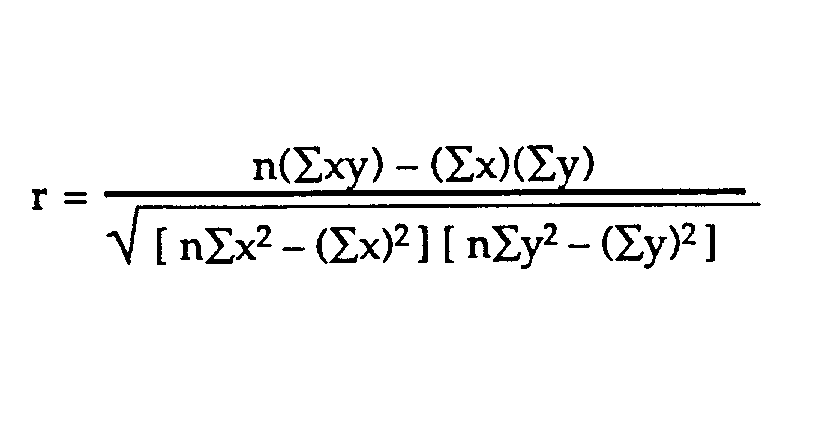

In [10]:
#correlation with seperate subplots

def plot_correlation_sep (df,strains,gb,fontsz=20):
    #df.at['OVI_minicircle_43','Te-Ap-N-D1']=df.at['OVI_minicircle_46','Te-Ap-N-D1']
    #df=df.drop('OVI_minicircle_46')
    reversed_df = df.iloc[::-1]
    n=len(strains)-1
    fig,axs = plt.subplots(n,n,figsize=(6.5*n,6.5*n))
    #draw distribution on world map
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(color="grey",ax=axs[len(strains)-2,0],alpha=0.3)
    came_from = countries[(countries['name'] == 'Ethiopia')|(countries['name'] == 'South Africa')|(countries['name'] == 'Venezuela')]
    came_from.plot(color='r',ax=axs[len(strains)-2,0],alpha=0.3)
    #axs[len(strains)-2,0].annotate('Dodola 940', xy=(40, 10), xytext=(45, -20),arrowprops=dict(facecolor='k', ec='None',shrink=0.05),fontsize=15)
    #axs[len(strains)-2,0].annotate('OVI', xy=(30, -25), xytext=(35, -35),arrowprops=dict(facecolor='k', ec='None', shrink=0.05),fontsize=15)
    #axs[len(strains)-2,0].annotate('Te-Ap-ND1', xy=(-70, 9), xytext=(-55, 24),arrowprops=dict(facecolor='k', ec='None',shrink=0.05),fontsize=15)
    axs[len(strains)-2,0].set_xticks([])
    axs[len(strains)-2,0].set_yticks([])
    #draw correlation plots   
    counti,countl=0,0
    for i in strains:
        countj,first=0,0
        for j in strains:
            if countj > counti:
                colors=['b' if i ==0.3 else 'r' for i in alphas]
                axs[counti,countj-1].set_aspect(aspect=1, adjustable='box')
                axs[counti,countj-1].grid(True)
                x=list(reversed_df[i][1:-1])
                y=list(reversed_df[j][1:-1])
                tb=list(reversed_df['EATRO1125'][1:-1])  
                x1=[i for i,j in zip(x,y) if np.isnan(i) == False and np.isnan(j) == False and i != 0 and j != 0]
                y1=[j for i,j in zip(x,y) if np.isnan(i) == False and np.isnan(j) == False and i != 0 and j != 0]
                x2=[i for i,j in zip(x,tb) if np.isnan(i) == False and np.isnan(j) == False and i != 0 and j != 0]
                tb1=[j for i,j in zip(x,tb) if np.isnan(i) == False and np.isnan(j) == False and i != 0 and j != 0]
                y2=[i for i,j in zip(y,tb) if np.isnan(i) == False and np.isnan(j) == False and i != 0 and j != 0]
                tb2=[j for i,j in zip(y,tb) if np.isnan(i) == False and np.isnan(j) == False and i != 0 and j != 0]
                #scatter plot
                if first ==0 :
                    corr = np.corrcoef(np.log(x1),np.log(y1))[0,1]
                    a=linregress(np.log(x1),np.log(y1))
                    print(a)
                    corr_tb = np.corrcoef(np.log(x2),np.log(tb1))[0,1]
                    a=linregress(np.log(x2),np.log(tb1))
                    print(a)
                    axs[counti,countj-1].scatter(x,y,alpha=alphas,label= f"{i.replace('WGS','')} vs {j.replace('WGS','')} R={round(corr,2)}")
                    axs[counti,countj-1].scatter(x,tb,alpha=[alphas],label= f"{i.replace('WGS','')} vs EATRO1125 R={round(corr_tb,2)}", color='orange',marker='s')
                    print(corr,corr_tb)
                    axs[counti,countj-1].set_xlabel(f'{i} minicircle copy number',fontsize=15)
                    axs[counti,countj-1].set_ylabel(f'minicircle copy number',fontsize=15)
                    axs[counti,countj-1].set_title(f"{i.replace('WGS','')} vs {j.replace('WGS','')} & EATRO1125",fontsize=fontsz)
                else:
                    corr = np.corrcoef(np.log(y1),np.log(x1))[0,1]
                    corr_tb = np.corrcoef(np.log(y2),np.log(tb2))[0,1]
                    a=linregress(np.log(x1),np.log(y1))
                    print(a)
                    #
                    a=linregress(np.log(y2),np.log(tb2))
                    print(a)
                    axs[counti,countj-1].scatter(y,x,alpha=alphas,label= f"{j.replace('WGS','')} vs {i.replace('WGS','')} R={round(corr,2)}")
                    axs[counti,countj-1].scatter(y,tb,alpha=[alphas],label= f"{j.replace('WGS','')} vs EATRO1125 R={round(corr_tb,2)}", color='orange',marker='s')
                    print(corr,corr_tb)
                    axs[counti,countj-1].set_xlabel(f'{j} minicircle copy number',fontsize=15)
                    axs[counti,countj-1].set_ylabel('minicircle copy number',fontsize=15)
                    axs[counti,countj-1].set_title(f"{j.replace('WGS','')} vs {i.replace('WGS','')} & EATRO1125",fontsize=fontsz) 
                #Linear Regression
                #a=np.array([i if np.isnan(i) == False else 0 for i in x]).reshape((-1, 1))
                #b=np.array([i if np.isnan(i) == False else 0 for i in y])
                #print(len(a),len(b),max(a)[0],max(b))
                #model = LinearRegression().fit(a,b)
                #r_sq = model.score(a, b)
                #print('slope:', model.coef_[0],'intercept',model.intercept_)
                
                #draw y=x line
                a=list(np.linspace(0.1,1000,10)) #start xy negative to make sure the line is straight
                #y1=[model.coef_[0]*i + model.intercept_ for i in x1]
                axs[counti,countj-1].plot(a,a,'-r',label=f'y=x')
                                          #,\np<0.001, R={round(corr,3)}')
                #styling
                axs[counti,countj-1].set_xscale('log')
                axs[counti,countj-1].set_yscale('log')
                axs[counti,countj-1].tick_params(axis='x', labelsize= 15)
                axs[counti,countj-1].tick_params(axis='y', labelsize= 15)
                leg=axs[counti,countj-1].legend(fontsize=15)
                for lh in leg.legendHandles: 
                    lh.set_alpha(1)
                axs[counti,countj-1].set_ylim([0.1,1000])
                axs[counti,countj-1].set_xlim([0.1,1000])
                axs[counti,countj-1].set_aspect(aspect=1, adjustable='box')
                axs[counti,countj-1].grid(True)
                first+=1
                countl+=1
            countj+=1
        counti+=1
    fig.tight_layout()
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3) #w/hspace: width/height of padding
    plt.show()    

In [11]:
#get the results for Published data: 
pub_dict,new=get_mini_abundance('/home/jovyan/graphing_data/Published_WGS_strain_copy_number.txt')
#combined=combined.drop('total minicircle copy number:')

In [12]:
#normalize by maxicircle copy number
pub_dict['Botat-1-1_pubWGS']={k:pub_dict['Botat-1-1_pubWGS'][k]*(8.38/1.02) for k in pub_dict['Botat-1-1_pubWGS']}
pub_dict['Dodola_943_pubWGS']={k:pub_dict['Dodola_943_pubWGS'][k]*(15.68/1.43) for k in pub_dict['Dodola_943_pubWGS']}
pub_dict['OVI_pubWGS']={k:pub_dict['OVI_pubWGS'][k]*(11.39/0.55) for k in pub_dict['OVI_pubWGS']}
pub_dict['Te-Ap-N-D1_pubWGS']={k:pub_dict['Te-Ap-N-D1_pubWGS'][k]*(8.62/0.89) for k in pub_dict['Te-Ap-N-D1_pubWGS']}


combined=combine_dict([pub_dict,combined])
combined.at['OVI_minicircle_43','Te-Ap-N-D1']=combined.at['OVI_minicircle_46','Te-Ap-N-D1']
combined=combined.drop('OVI_minicircle_46')

combined.transpose().to_csv('/home/jovyan/graphing_data/Tbeqev_copy_nb_read_count_method.csv')

In [13]:
#plot_correlation_sep (combined,['940','OVI','Te-Ap-N-D1'],alphas)

In [14]:
#plot_correlation_sep (combined,['Dodola_943_pubWGS','OVI_pubWGS','Te-Ap-N-D1_pubWGS'],alphas,fontsz=18)

In [15]:
#plot_correlation_sep (combined,['OVI_pubWGS','OVI','Te-Ap-N-D1_pubWGS','Te-Ap-N-D1','Dodola_943_pubWGS','940'],alphas,fontsz=15)

In [16]:
#copy number analysis with a different algorithm: samtool depth directly
Frewgs2=pd.read_csv('/home/jovyan/graphing_data/Fre_TeqTev_depth_mini_copy.csv').transpose()
Frewgs2=Frewgs2.rename(columns=Frewgs2.iloc[0]).drop(Frewgs2.index[0])#.iloc[14:,:]
tmp=Frewgs2.to_dict()
Frewgs2={k:{c:tmp[k][c] for c in tmp[k] if not c.startswith('N') and ('maxicircle' not in c or ('maxicircle' in c and k in c)) and 'total' not in c} for k in tmp}
pub2=pd.read_csv('/home/jovyan/graphing_data/Public_Tbeqev_depth_mini_copy.csv').transpose()
pub2=pub2.rename(columns=pub2.iloc[0]).drop(pub2.index[0])#.iloc[1:-13,:]
tmp=pub2.to_dict()
pub2={k:{c:tmp[k][c] for c in tmp[k] if not (c.startswith('N') or 'total' in c)} for k in tmp}
match={'Dodola_943_pubWGS':'940','OVI_pubWGS':'OVI','Te-Ap-N-D1_pubWGS':'Te-Ap-N-D1'}
nml={}
for k in match:
    ratio=pub2[k]['Maxicircle']/Frewgs2[match[k]][f'_{match[k]}_maxicircle']
    nml[f'{k}_nml']={c:pub2[k][c]/ratio for c in pub2[k]}
combined2=combine_dict([Frewgs2,eatro1125,pub2,nml])
combined2.to_csv('/home/jovyan/Tbg1_Tbb_Tbr_minicircle_annotation/Tbeqev_copynb.csv')

/tmp/ipykernel_175/1602403686.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


LinregressResult(slope=0.9771720650215949, intercept=-0.3804666070729805, rvalue=0.9386825713483218, pvalue=4.906741516027754e-21, stderr=0.055382551975013544, intercept_stderr=0.17912740382508313)
LinregressResult(slope=0.1652500559895516, intercept=2.1557390797822085, rvalue=0.17486249394185382, pvalue=0.26206266500905584, stderr=0.14531475121825327, intercept_stderr=0.4709168288198352)
0.9386825713483219 0.17486249394185382
LinregressResult(slope=1.0711532929545147, intercept=-0.008285179974448553, rvalue=0.920748568469047, pvalue=8.992167868497578e-19, stderr=0.07003655033522263, intercept_stderr=0.2265237874930937)
LinregressResult(slope=0.15303923051139615, intercept=2.1475160354440144, rvalue=0.16464746785633647, pvalue=0.29742651439665585, stderr=0.1449605612441755, intercept_stderr=0.5138708242870754)
0.9207485684690468 0.16464746785633647
LinregressResult(slope=0.9838325916153782, intercept=0.6877177515746147, rvalue=0.8803653058766088, pvalue=3.422418600567186e-15, stderr=0.

/tmp/ipykernel_175/1602403686.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


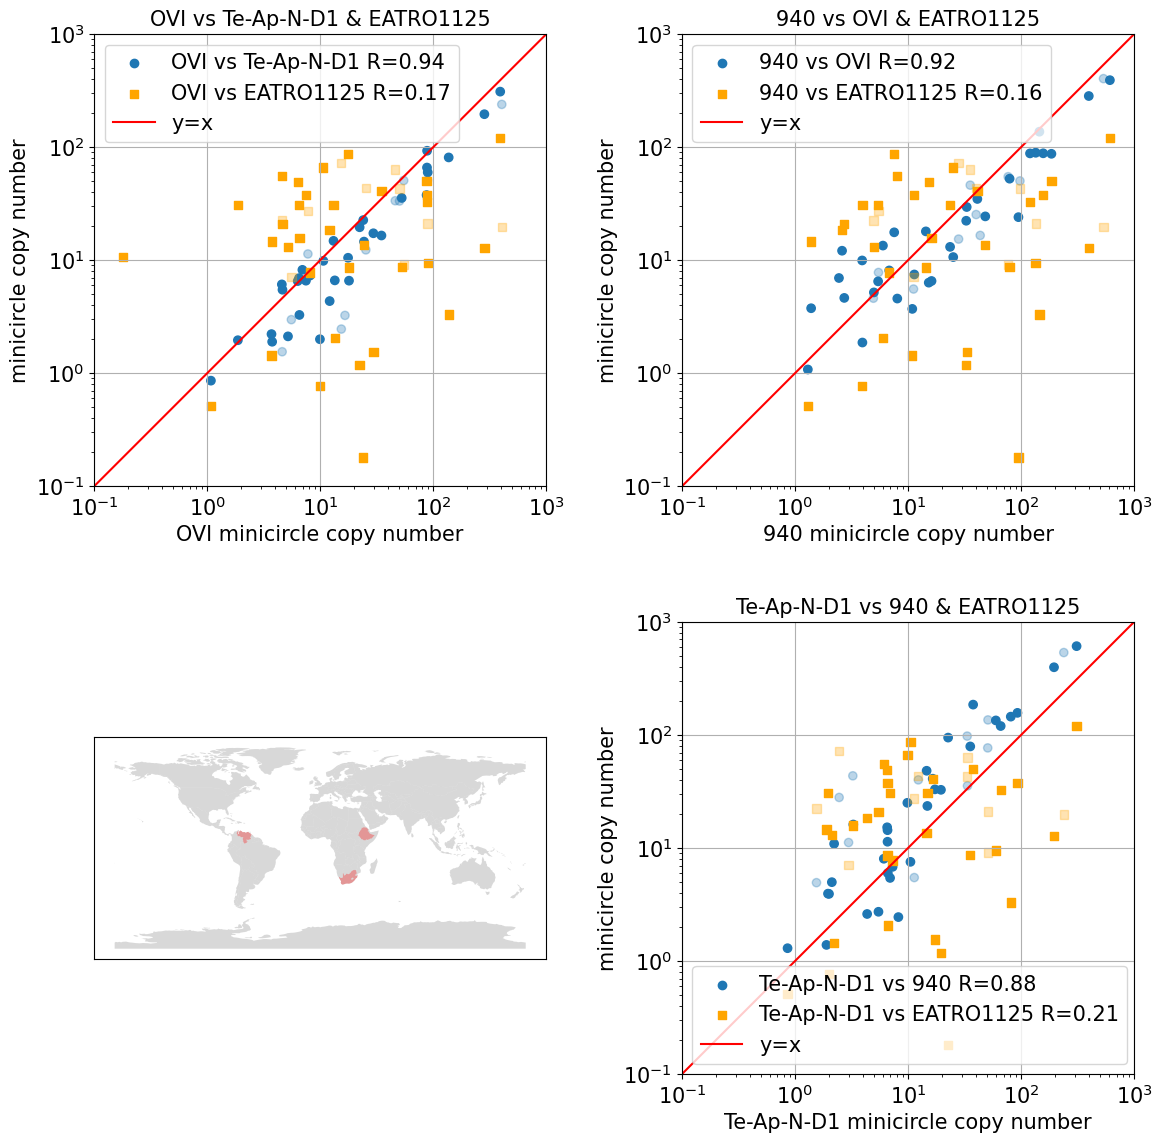

In [17]:
plot_correlation_sep (combined2,['OVI','Te-Ap-N-D1','940'],alphas,fontsz=15)

/tmp/ipykernel_175/1602403686.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


LinregressResult(slope=0.7747392819724161, intercept=0.6819588567444579, rvalue=0.8917756906756887, pvalue=4.189791664960847e-17, stderr=0.05859909677481224, intercept_stderr=0.1841481407924521)
LinregressResult(slope=0.199346574948796, intercept=2.0517743045120476, rvalue=0.22694321842680082, pvalue=0.1384891739086624, stderr=0.13200331960405107, intercept_stderr=0.42296842133507945)
0.8917756906756888 0.22694321842680076
LinregressResult(slope=0.8555355782001075, intercept=0.18593205574512028, rvalue=0.9039393507244445, pvalue=7.724805330846425e-18, stderr=0.06101993738431423, intercept_stderr=0.19360634945473915)
LinregressResult(slope=0.20597075427323353, intercept=2.0854932909667983, rvalue=0.21135242314446326, pvalue=0.17366612847201618, stderr=0.14875896309918893, intercept_stderr=0.4498303191379796)
0.9039393507244444 0.21135242314446323
LinregressResult(slope=0.9351376008333411, intercept=-0.0750109408297206, rvalue=0.8894473102054475, pvalue=1.4590044909116946e-16, stderr=0.0

/tmp/ipykernel_175/1602403686.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


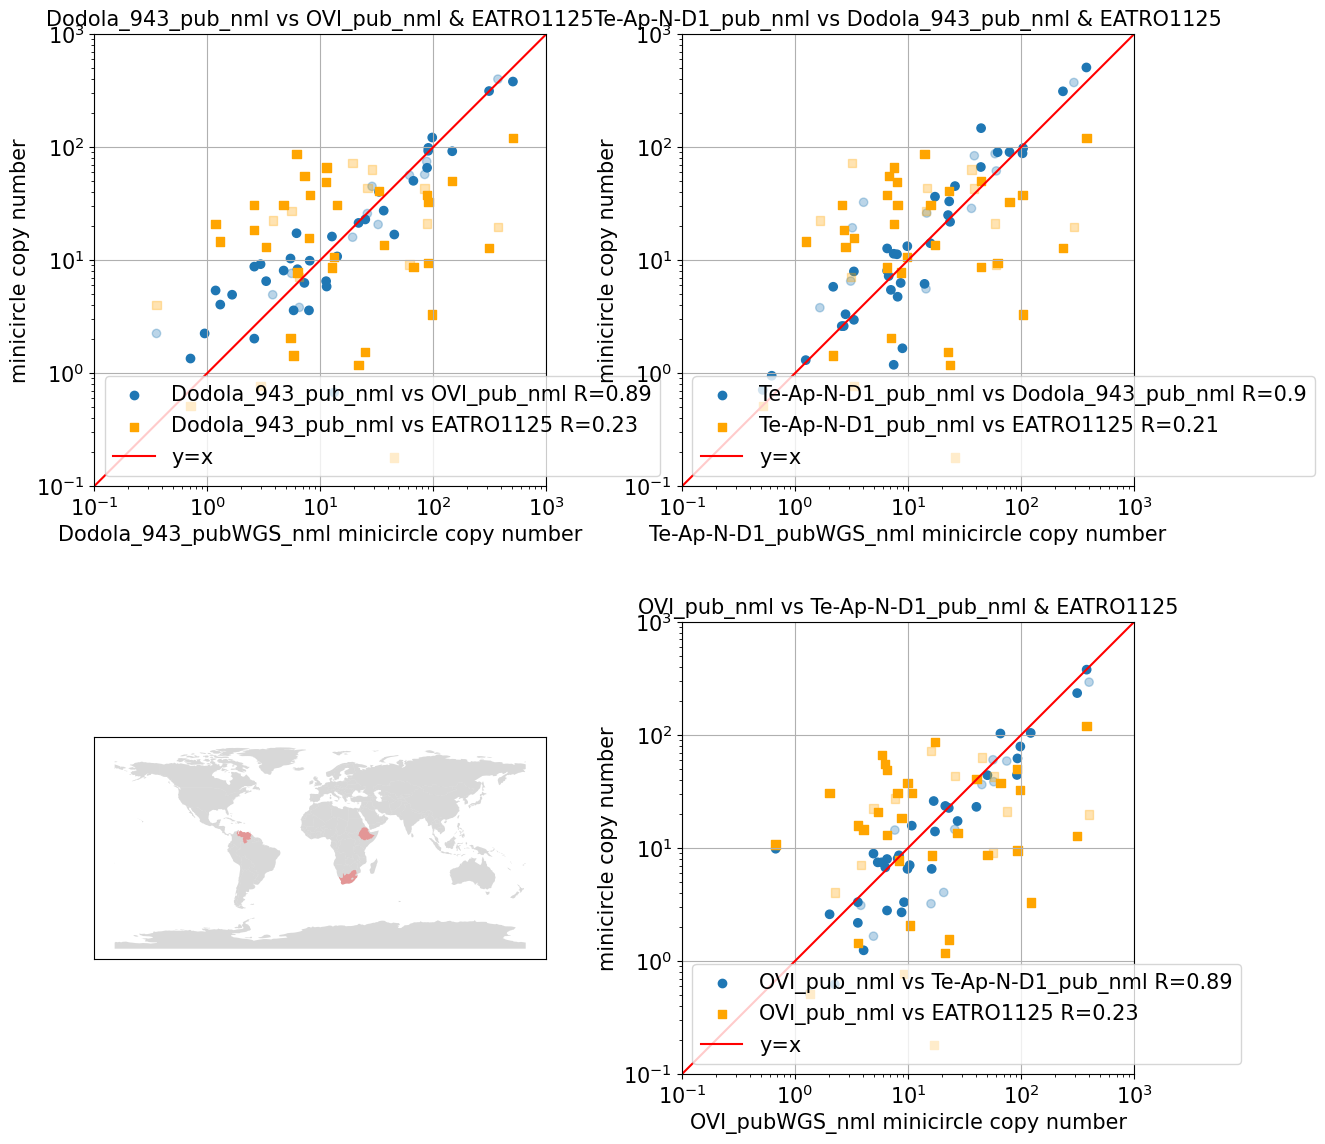

In [18]:
plot_correlation_sep (combined2,['Dodola_943_pubWGS_nml','OVI_pubWGS_nml','Te-Ap-N-D1_pubWGS_nml'],alphas,fontsz=15)

/tmp/ipykernel_175/1602403686.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


LinregressResult(slope=1.0350521330122964, intercept=-0.09322967658835868, rvalue=0.9821442607981062, pvalue=7.794421610051136e-33, stderr=0.030234950395017553, intercept_stderr=0.09576750402992625)
LinregressResult(slope=0.22600685752777497, intercept=1.9659028037991289, rvalue=0.22899197345462505, pvalue=0.13486739377124182, stderr=0.14824521510733732, intercept_stderr=0.4689998985237284)
0.9821442607981061 0.22899197345462502
LinregressResult(slope=0.9351376008333411, intercept=-0.0750109408297206, rvalue=0.8894473102054475, pvalue=1.4590044909116946e-16, stderr=0.07244042758010209, intercept_stderr=0.22710846304051463)
LinregressResult(slope=0.20597075427323353, intercept=2.0854932909667983, rvalue=0.21135242314446326, pvalue=0.17366612847201618, stderr=0.14875896309918893, intercept_stderr=0.4498303191379796)
0.8894473102054473 0.21135242314446323
LinregressResult(slope=0.9631201179013117, intercept=-0.3047761985729007, rvalue=0.9263728157151406, pvalue=2.0261749001261836e-19, std

/tmp/ipykernel_175/1602403686.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


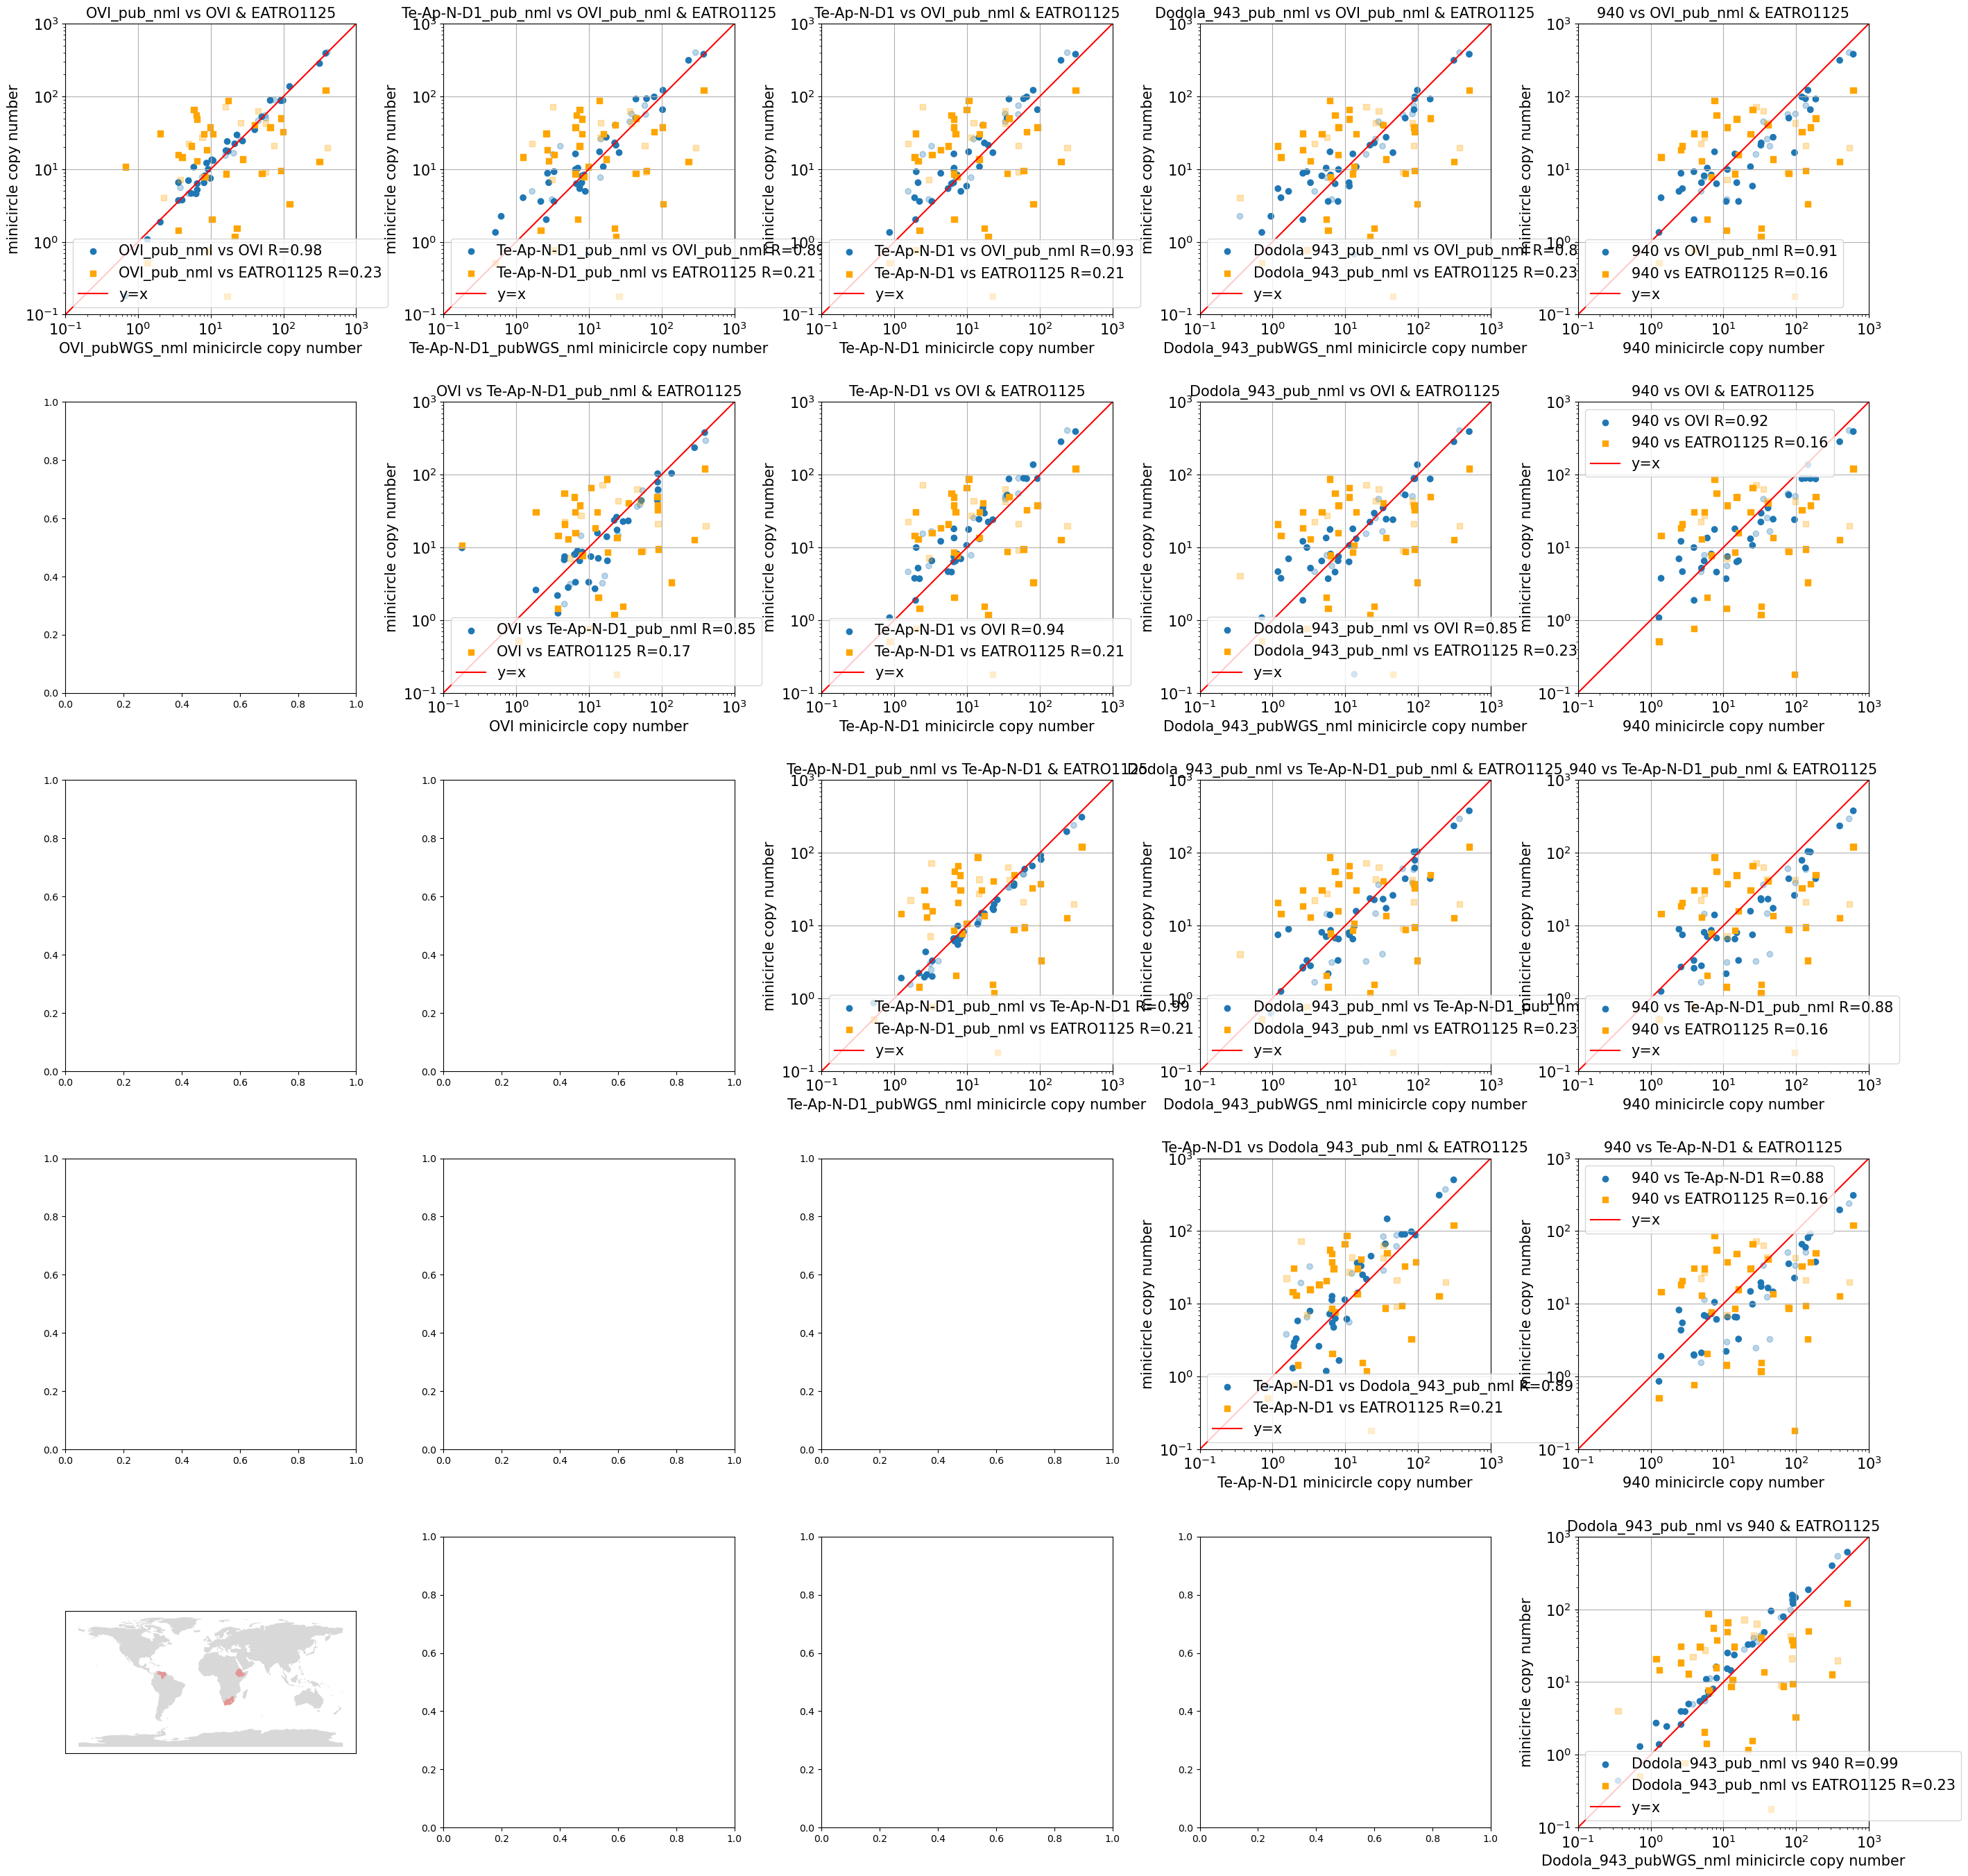

In [19]:
plot_correlation_sep (combined2,['OVI_pubWGS_nml','OVI','Te-Ap-N-D1_pubWGS_nml','Te-Ap-N-D1','Dodola_943_pubWGS_nml','940'],alphas,fontsz=15)